# NIH.AI Workshop-1

## Discovering Function Using Small-molecule Structure Information: Generating Descriptor Data and Analysis

### S.Ravichandran; *ravichandrans@mail.nih.gov*

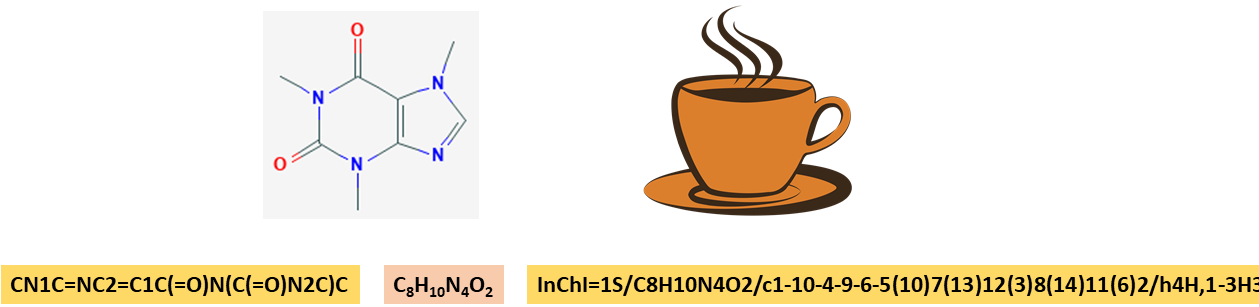

In [1]:
from IPython.core.display import Image
Image(filename='Img/SMILES-Figures.png')

## Latest version of the document will be available from the following GitHub site

https://github.com/ravichas/SRWkshp1

This is the first part of NIH.AI ML Workshop-1. The second part, Workshop-1a, (https://github.com/ravichas/SRWkshp1a) is the continuation where we will cover Machine-Learning (ML) using Ensembl methods such as RandomForest. 

This workshop is a primer on how to explore small (drug-like) molecule chemical structures and generate descriptors for Machine-learning. This effort is part of the knowledge/capabilities-transfer for the NCI-DOE Pilot projects (https://datascience.cancer.gov/collaborations/joint-design-advanced-computing). We will be covering the results of Pilot projects in separate workshop(s). For this workshop, I will use the procedures, tools (python rdkit libraries) and results from the AMPL (https://arxiv.org/abs/1911.05211) and other Pilot projects to guide us through this effort. Towards this goal, we will follow the AMPL feature steps, Data Curation (Data; SMILES), featurization (fingerprints) and analysis. OpenSource software like OpenBabel are used for generating molecular features. Taking into account the avilability of the number of descriptors and user-friendliness, we will use Python based Open-Source Cheminformatics Software, **rdkit**, and **mordred** for this hands-on tutorial. 

## Software-setup Information 

Please [click on this link](software-setup.ipynb) here to see how to install the software needed this tutorial on your own system. 

## Molecular information 

To generate molecular descriptors, we need information about the molecules. The information could be in any of the following formats:
a) string of characters (with no spaces) like SMILES, b) SDF formatted file c) 3D mol2/sd/PDB file. For this exercise, we will use SMILES strings as molecular representations. 

Please read about SMILES from here,
https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system

You can also use pdb, SDF, mol2, and other formats to represent molecules but I will not discuss them in this workshop. Please visit the following link for information on these chemical formats, https://en.wikipedia.org/wiki/Chemical_file_format 

Other useful tutorial pages:

* https://rdkit.org/docs/GettingStartedInPython.html
* https://github.com/rdkit/rdkit-tutorials/tree/master/notebooks
* https://sourceforge.net/p/rdkit/mailman/rdkit-discuss/

## Load the libraries

In [2]:
import os
import numpy as np
import pandas as pd
from IPython.core.display import Image
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor

#Needed to show molecules
from rdkit.Chem.Draw import IPythonConsole 

from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

# Download this from http://pypi.python.org/pypi/futures
# for parallel jobs (especially for mordred large molecular dataset)
from concurrent import futures


RDKit WARNING: [22:31:12] Enabling RDKit 2019.09.3 jupyter extensions


### Checking directory/folder location (not important if you are running the cloud instance)
Make sure you are in the directory or folder that has **Img** and **Data** subfolders/directories. You can check using using ```os.chdir``` command (see below for for the format)

In [3]:
os.getcwd()
# os.chdir('REPLACE_YOUR_DIR_NAME')

'C:\\Users\\ravichandrans\\Documents\\GitHub\\SRWkshp1'

## Exploring molecular structures

For this hands-on, we are going to look at a recent paper published by Simpson et al (see below) on c-Abl kinase activators. The PubMed link for the manuscript is https://www.ncbi.nlm.nih.gov/pubmed/?term=30689376

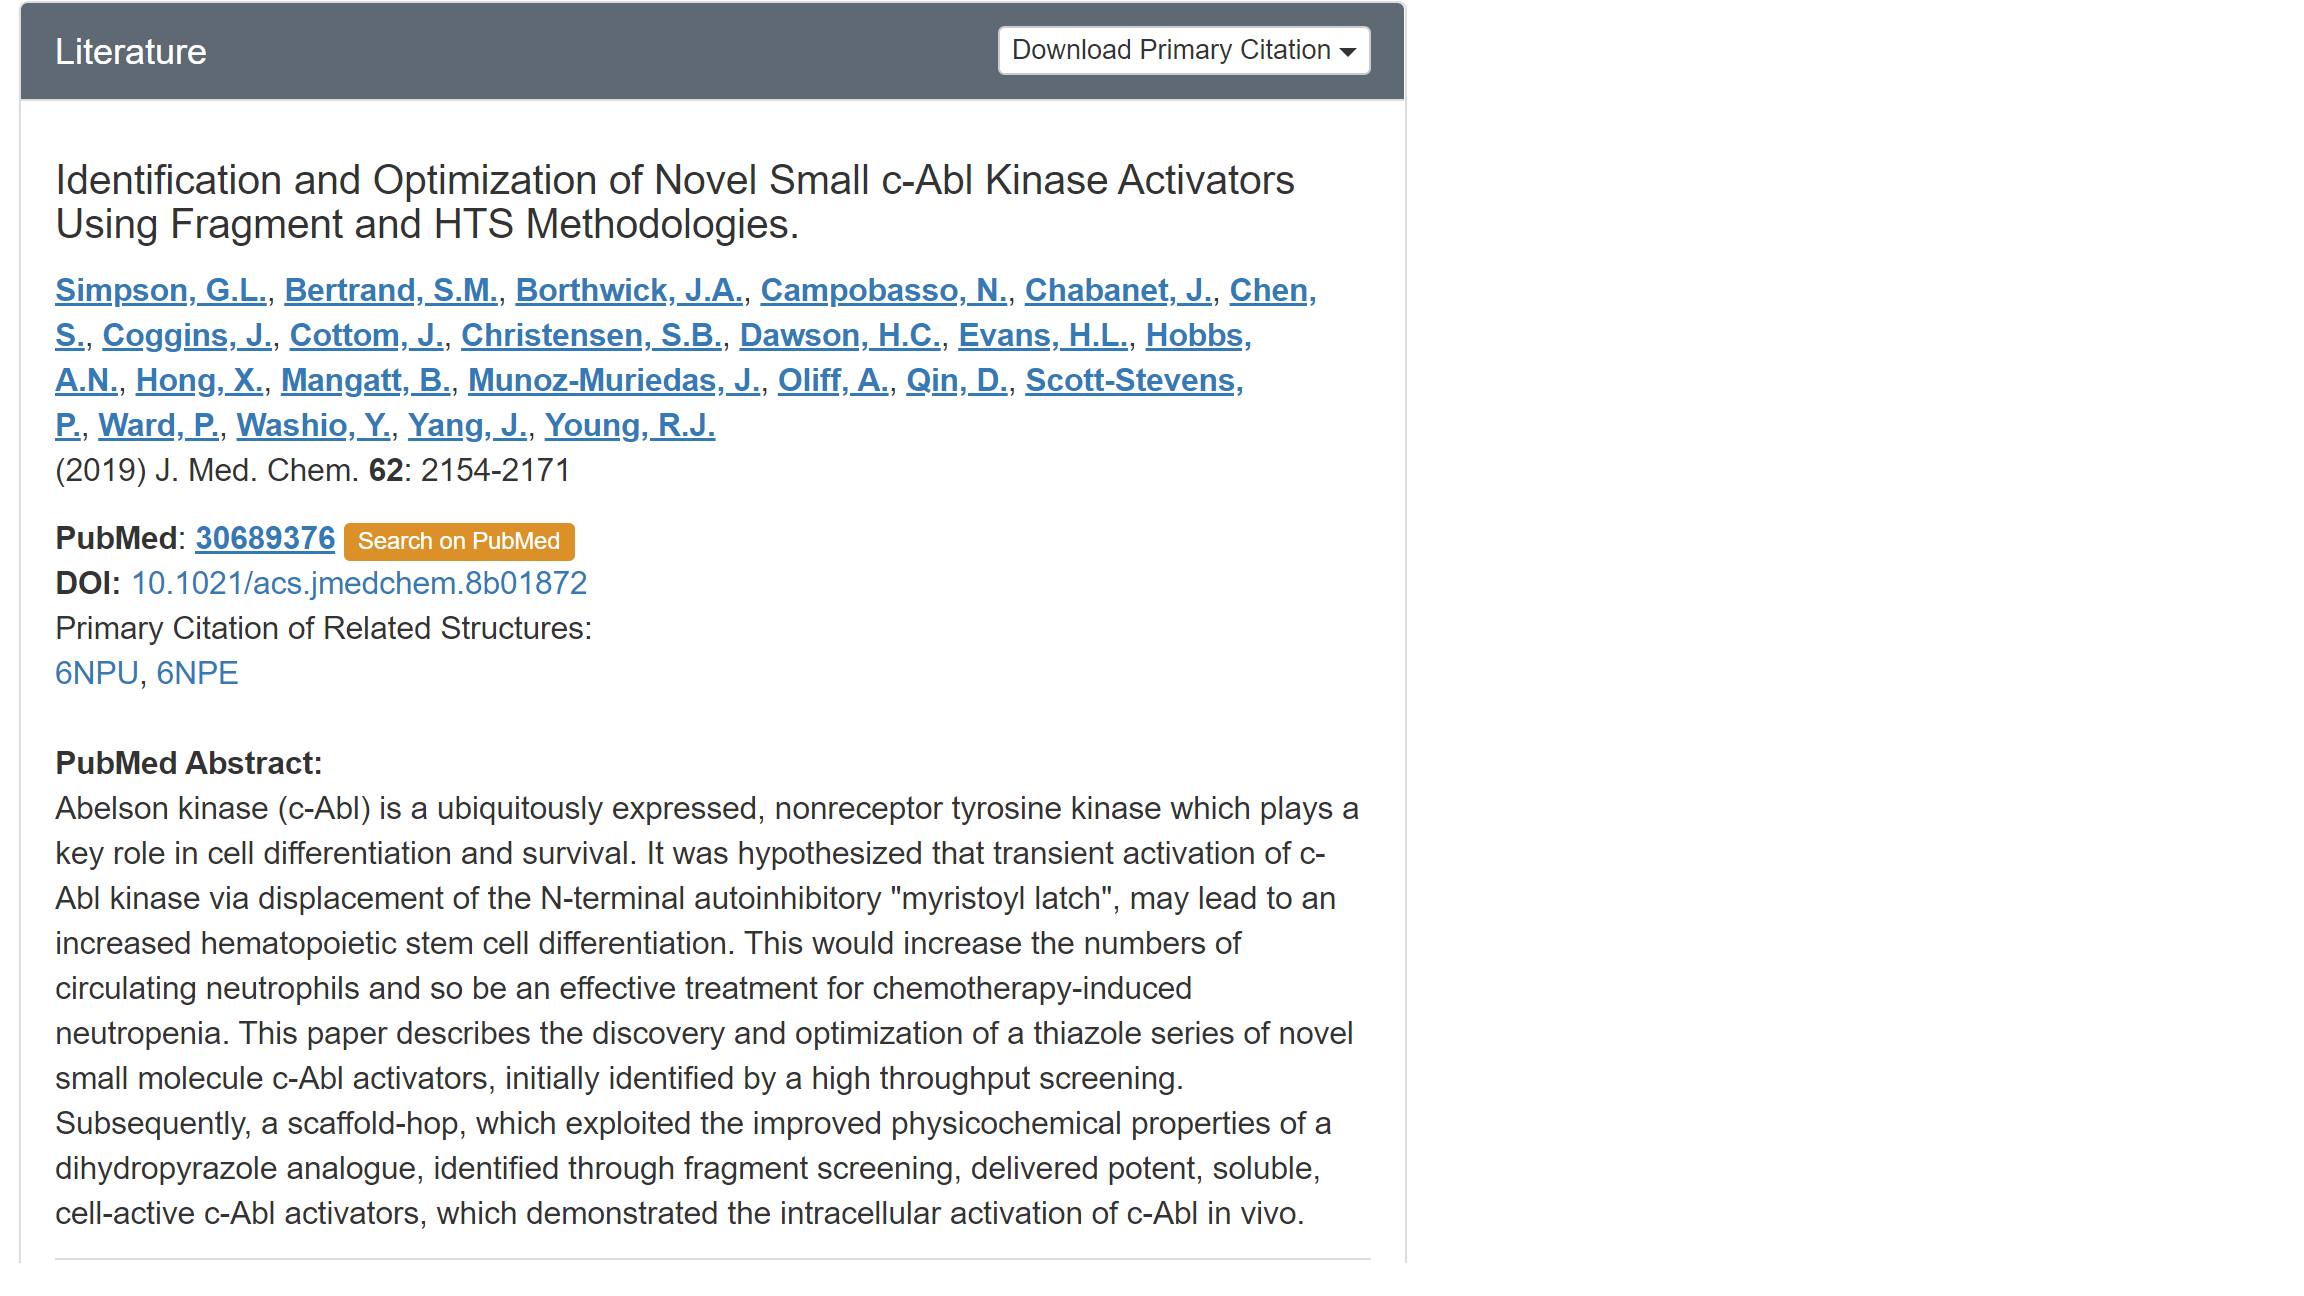

In [4]:
Image(filename='Img/6NPV-paper.png')

The protein system that is explored in this manuscript is c-Abl kinase (PDB: https://www.rcsb.org/structure/6NPV; UniProt: https://www.uniprot.org/uniprot/P00519). The small molecule inhibitors mentioned in this manuscript are Imatinib, Dastinib and GNF5/ABL001 and the activator, DPH. 

To visualize small molecules, we need atomic information. This can be obtained from different sources and formats (PubChem/DrugBank etc.; Formats: SMILES, PDB, Mol, sdf etc.). We will use SMILES strings for molecular information. There are many sources available for learning about SMILES string representation of molecules. Here are some of them:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3495655/ <br>
https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system

### Where do we get the SMILES strings for molecules? 

PubChem (https://pubchem.ncbi.nlm.nih.gov/) is a great resource for small molecule information. 

You can search PubChem wih the name of a compound (Ex. Imatinib). If you want to search for a list, you have to create a **file** with **one id per line** and upload it via "Upload ID list" PubChem link. Here is a list for the four molecules discussed in the paper. You can also cut and paste the ids directly into the PubChem box (see below).

5291 <br>
3062316 <br>
44129660 <br>
660311

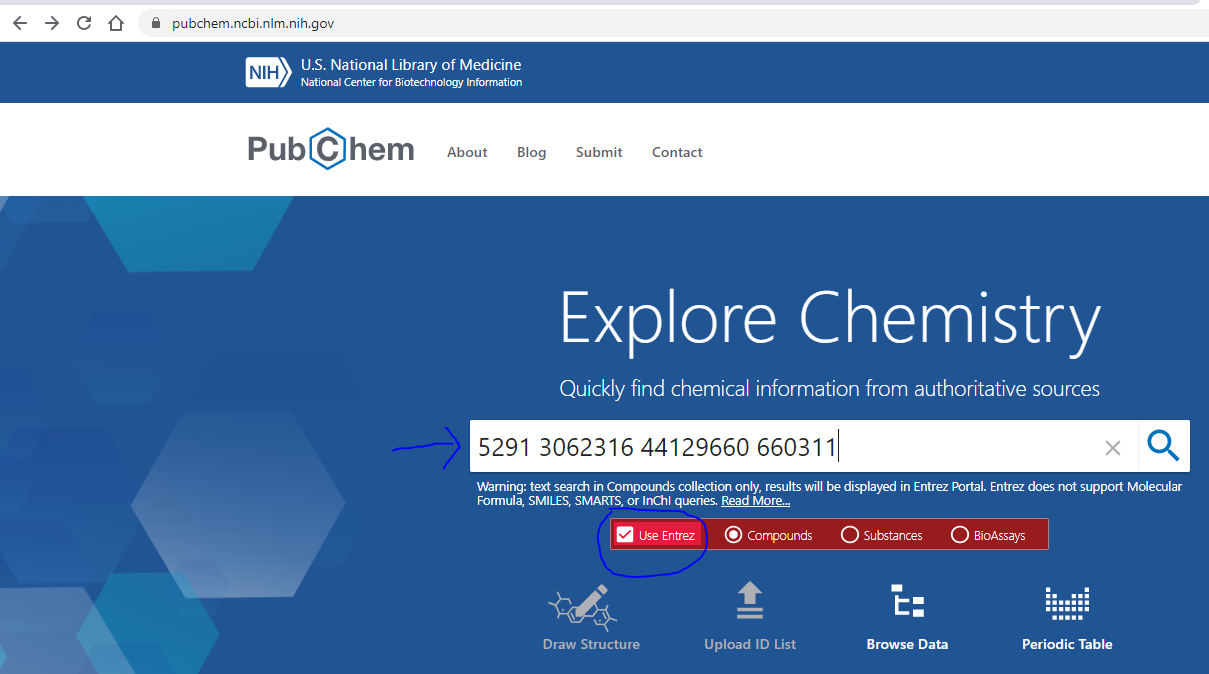

In [5]:
Image(filename='Img/PubChem-input.PNG')

### We will be using a chemoinformatics python library called rdkit for visualizing, analyzing and calculating descriptors. You can get more information here, 
https://www.rdkit.org/

### Let us read in the small molecule inhibitors/activators described in the paper. 
The following is figure-1 from the manuscript mentioned above; https://www.ncbi.nlm.nih.gov/pubmed/?term=30689376 )

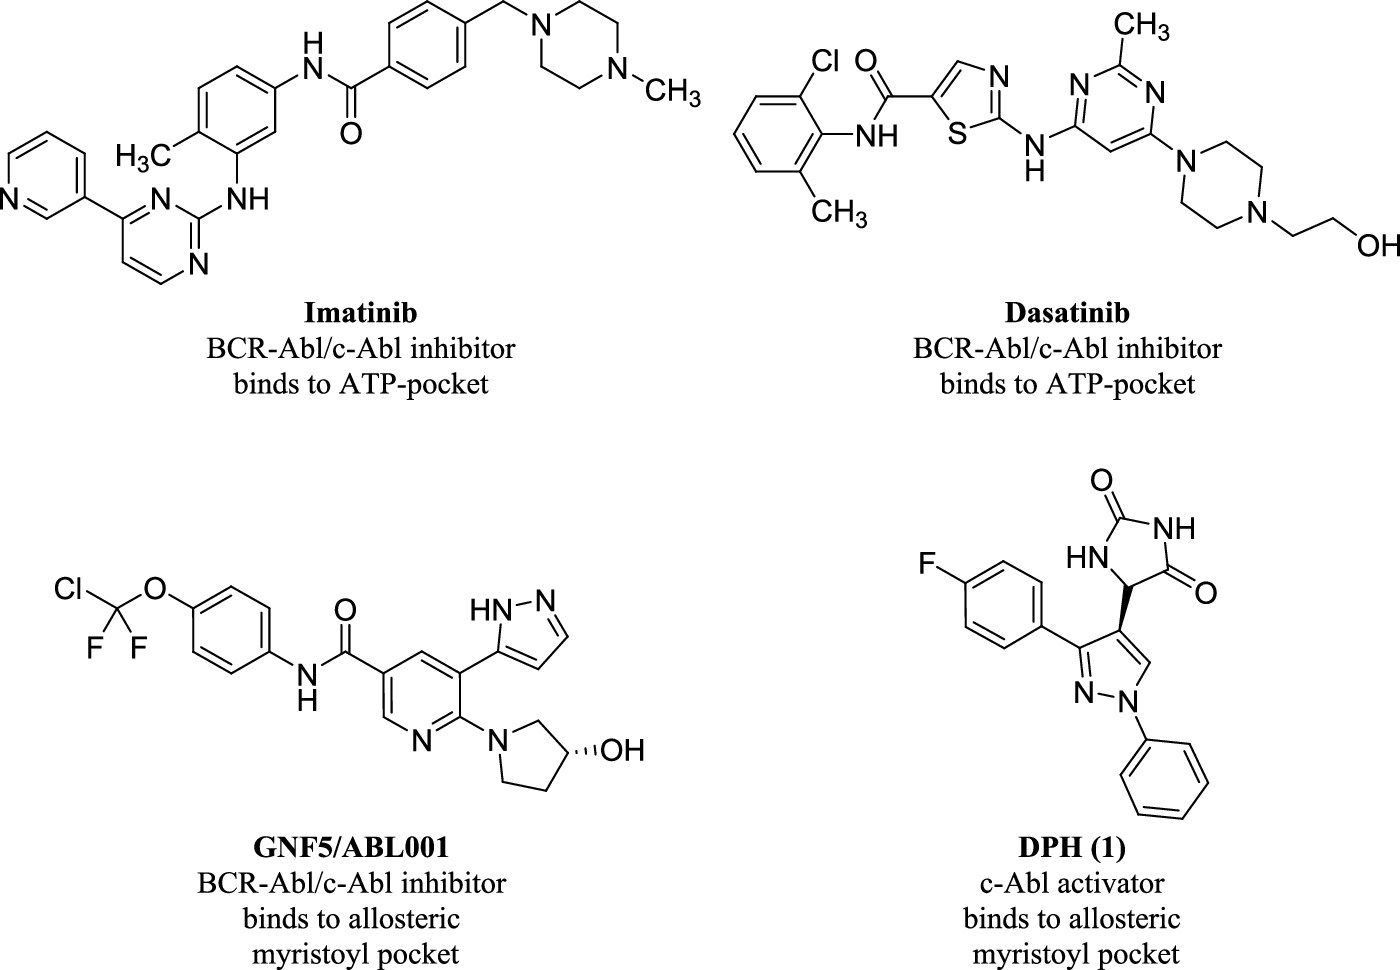

In [6]:
Image(filename='Img/jm-2018-01872w_0001.jpeg')

Let us use SMILES string to load imatinib, dasatinib, gnf5 and dph.

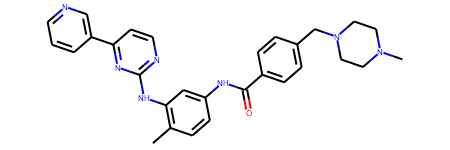

In [7]:
imatinib = 'CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5'
imatinib_m = Chem.MolFromSmiles(imatinib)
imatinib_m

### Options that can make molecules look better

Now let us load the rest of the molecules

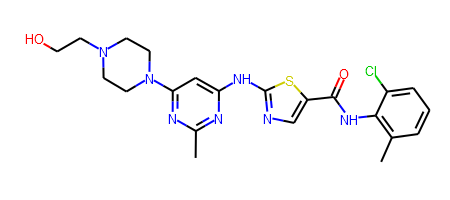

In [8]:
IPythonConsole.molSize = (450,200)
dasatinib = 'CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(=N3)C)N4CCN(CC4)CCO'
dasatinib_m = Chem.MolFromSmiles(dasatinib)
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(dasatinib_m)
dasatinib_m

Let use use the SMILES strings to read the remaining molecules

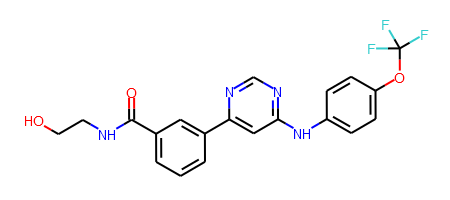

In [9]:
IPythonConsole.molSize = (450,200)
gnf5 = 'C1=CC(=CC(=C1)C(=O)NCCO)C2=CC(=NC=N2)NC3=CC=C(C=C3)OC(F)(F)F'
gnf5_m = Chem.MolFromSmiles(gnf5)
rdDepictor.Compute2DCoords(gnf5_m)
gnf5_m

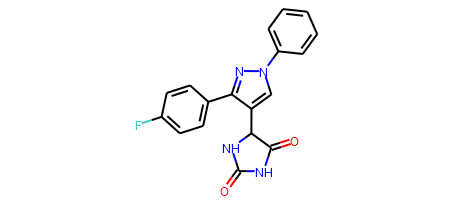

In [10]:
IPythonConsole.molSize = (450,200)
dph = 'C1=CC=C(C=C1)N2C=C(C(=N2)C3=CC=C(C=C3)F)C4C(=O)NC(=O)N4'
dph_m = Chem.MolFromSmiles(dph)
rdDepictor.Compute2DCoords(dph_m)
dph_m

### We can also read mol or pdb files. Here is an example of using a mol format to read imatinib.

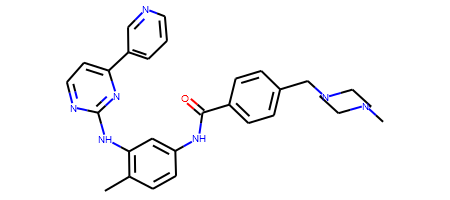

In [11]:
imatinib_mblock = '''5291
  -OEChem-12041912263D

 68 72  0     0  0  0  0  0  0999 V2000
   -0.8276    0.2486   -1.0418 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.4576    0.2661   -0.6555 N   0  0  0  0  0  0  0  0  0  0  0  0
    8.5148   -0.1616    1.3305 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1066   -1.8326   -0.2329 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9447   -1.8876   -0.2704 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.3746    0.3576    0.1045 N   0  0  0  0  0  0  0  0  0  0  0  0
   -6.6079   -0.2578   -0.5599 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8521    4.8337    0.2988 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.1553    0.3240    0.7799 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.8492    0.6633   -0.9021 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.1228   -0.5578    1.5768 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.8175   -0.2175   -0.1048 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5353    1.1080   -1.4148 C   0  0  0  0  0  0  0  0  0  0  0  0
    9.4364   -1.0051    2.0887 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.1042    0.6761   -1.2347 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7827   -0.6720   -1.3051 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1263    1.6331   -1.0017 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4565   -1.0715   -1.1393 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8002    1.2338   -0.8357 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4653   -0.1185   -0.9046 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0830   -0.5355   -0.7298 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3242   -2.5126    0.0151 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7215   -2.5414   -0.0031 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5228   -1.8710   -0.2463 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7034   -3.8430    0.4979 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2879   -3.8040    0.5124 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4866   -4.4744    0.7558 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9723   -4.5838    0.7689 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3266   -0.5337   -0.2407 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7751    1.6458    0.1230 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7560    2.5992    0.4912 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0569    2.0547   -0.1837 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.9398    1.0495   -0.5211 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7243    2.2490    1.3556 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7742    3.8929   -0.0052 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7569    3.1894    1.6923 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8648    4.4564    1.1418 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.2161    1.3575    1.1487 H   0  0  0  0  0  0  0  0  0  0  0  0
    5.1467   -0.0373    1.0060 H   0  0  0  0  0  0  0  0  0  0  0  0
    8.0827    0.5537   -1.9681 H   0  0  0  0  0  0  0  0  0  0  0  0
    8.0090    1.7178   -0.6393 H   0  0  0  0  0  0  0  0  0  0  0  0
    6.8911   -0.4479    2.6432 H   0  0  0  0  0  0  0  0  0  0  0  0
    6.9627   -1.6124    1.3143 H   0  0  0  0  0  0  0  0  0  0  0  0
    8.7669   -1.2503   -0.4758 H   0  0  0  0  0  0  0  0  0  0  0  0
    9.8378    0.1434   -0.2827 H   0  0  0  0  0  0  0  0  0  0  0  0
    5.6549    2.1619   -1.1291 H   0  0  0  0  0  0  0  0  0  0  0  0
    5.7622    1.0411   -2.4869 H   0  0  0  0  0  0  0  0  0  0  0  0
   10.4708   -0.6770    1.9372 H   0  0  0  0  0  0  0  0  0  0  0  0
    9.3641   -2.0606    1.8025 H   0  0  0  0  0  0  0  0  0  0  0  0
    9.2357   -0.9248    3.1628 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.5361   -1.4277   -1.5094 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.3744    2.6892   -0.9456 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2390   -2.1304   -1.2426 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0439    1.9918   -0.6479 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.7149   -2.3706    0.0288 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5694   -0.8966   -0.6987 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3457   -4.3050    0.7161 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4543   -5.4884    1.1455 H   0  0  0  0  0  0  0  0  0  0  0  0
   -5.7332   -2.5044   -0.4357 H   0  0  0  0  0  0  0  0  0  0  0  0
   -5.6194   -4.0112    1.4417 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7836   -5.5486    1.2524 H   0  0  0  0  0  0  0  0  0  0  0  0
   -5.5050   -4.7850   -0.1664 H   0  0  0  0  0  0  0  0  0  0  0  0
   -6.3940    3.0829   -0.1521 H   0  0  0  0  0  0  0  0  0  0  0  0
   -7.9712    1.2730   -0.7724 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6516    1.2546    1.7888 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5283    4.2446   -0.7026 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9444    2.9389    2.3645 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1356    5.2260    1.3726 H   0  0  0  0  0  0  0  0  0  0  0  0
  1 21  2  0  0  0  0
  2  9  1  0  0  0  0
  2 10  1  0  0  0  0
  2 13  1  0  0  0  0
  3 11  1  0  0  0  0
  3 12  1  0  0  0  0
  3 14  1  0  0  0  0
  4 21  1  0  0  0  0
  4 22  1  0  0  0  0
  4 55  1  0  0  0  0
  5 23  1  0  0  0  0
  5 29  1  0  0  0  0
  5 59  1  0  0  0  0
  6 29  1  0  0  0  0
  6 30  2  0  0  0  0
  7 29  2  0  0  0  0
  7 33  1  0  0  0  0
  8 35  1  0  0  0  0
  8 37  2  0  0  0  0
  9 11  1  0  0  0  0
  9 38  1  0  0  0  0
  9 39  1  0  0  0  0
 10 12  1  0  0  0  0
 10 40  1  0  0  0  0
 10 41  1  0  0  0  0
 11 42  1  0  0  0  0
 11 43  1  0  0  0  0
 12 44  1  0  0  0  0
 12 45  1  0  0  0  0
 13 15  1  0  0  0  0
 13 46  1  0  0  0  0
 13 47  1  0  0  0  0
 14 48  1  0  0  0  0
 14 49  1  0  0  0  0
 14 50  1  0  0  0  0
 15 16  2  0  0  0  0
 15 17  1  0  0  0  0
 16 18  1  0  0  0  0
 16 51  1  0  0  0  0
 17 19  2  0  0  0  0
 17 52  1  0  0  0  0
 18 20  2  0  0  0  0
 18 53  1  0  0  0  0
 19 20  1  0  0  0  0
 19 54  1  0  0  0  0
 20 21  1  0  0  0  0
 22 24  2  0  0  0  0
 22 26  1  0  0  0  0
 23 24  1  0  0  0  0
 23 25  2  0  0  0  0
 24 56  1  0  0  0  0
 25 27  1  0  0  0  0
 25 28  1  0  0  0  0
 26 27  2  0  0  0  0
 26 57  1  0  0  0  0
 27 58  1  0  0  0  0
 28 60  1  0  0  0  0
 28 61  1  0  0  0  0
 28 62  1  0  0  0  0
 30 31  1  0  0  0  0
 30 32  1  0  0  0  0
 31 34  1  0  0  0  0
 31 35  2  0  0  0  0
 32 33  2  0  0  0  0
 32 63  1  0  0  0  0
 33 64  1  0  0  0  0
 34 36  2  0  0  0  0
 34 65  1  0  0  0  0
 35 66  1  0  0  0  0
 36 37  1  0  0  0  0
 36 67  1  0  0  0  0
 37 68  1  0  0  0  0
M  END
'''
imatinib_m = Chem.MolFromMolBlock(imatinib_mblock)
IPythonConsole.molSize = (450,200)
imatinib_m

### How to get help in rdkit?

Other than online help, https://www.rdkit.org/docs/index.html, we can also get inline help like the following command.

In [12]:
help(imatinib_m.GetNumAtoms)

Help on method GetNumAtoms:

GetNumAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetNumAtoms( (Mol)arg1 [, (int)onlyHeavy=-1 [, (bool)onlyExplicit=True]]) -> int :
        Returns the number of atoms in the molecule.
        
          ARGUMENTS:
            - onlyExplicit: (optional) include only explicit atoms (atoms in the molecular graph)
                            defaults to 1.
          NOTE: the onlyHeavy argument is deprecated
        
    
        C++ signature :
            int GetNumAtoms(class RDKit::ROMol [,int=-1 [,bool=True]])



### Auto-complete 
For example, if you type imatinib_m.```<TAB>```, you will see a list of sub-commands that can be used with "imatinib_m" object (see below)

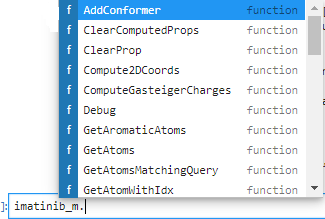

In [13]:
Image(filename='Img/cdkit_tab_help.png')

In [14]:
# Tab to get additional help on commands
# uncomment the following line and hit <TAB> to seee how this works
# imatinib_m.

### More than one molecules: Molecular display in a grid. 
Useful for presentations/seminars/manuscripts

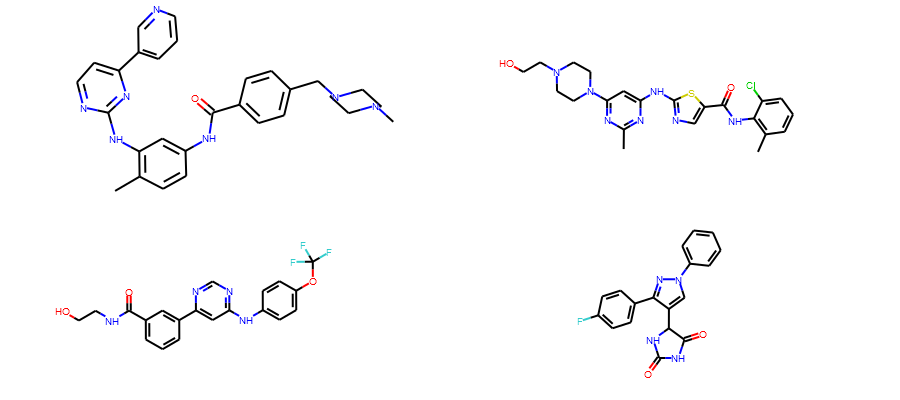

In [15]:
IPythonConsole.molSize = (450,400)
molecules = [ imatinib_m, dasatinib_m, gnf5_m, dph_m]
Draw.MolsToGridImage(molecules, molsPerRow = 2, subImgSize=(450, 200))

### How to save the molecular grid image to a file? 

In [16]:
img = Draw.MolsToGridImage(molecules, molsPerRow = 2, subImgSize=(450, 200))

# uncomment the following line to save the molecular display in a file
# img.save('testimage.png')

### Pharmacophore: How to see the presence of a core component fragment in a list of molecular library? 

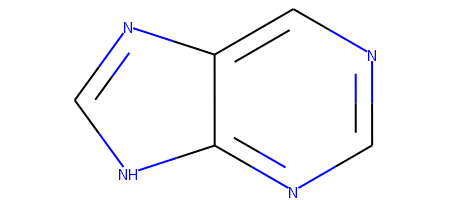

In [17]:
IPythonConsole.molSize = (450,200)
core = Chem.MolFromSmiles( 'c1ncc2nc[nH]c2n1' )
rdDepictor.Compute2DCoords(core)
core

#### Note to read a list of molecules, use ```Chem.SDMolSupplier```

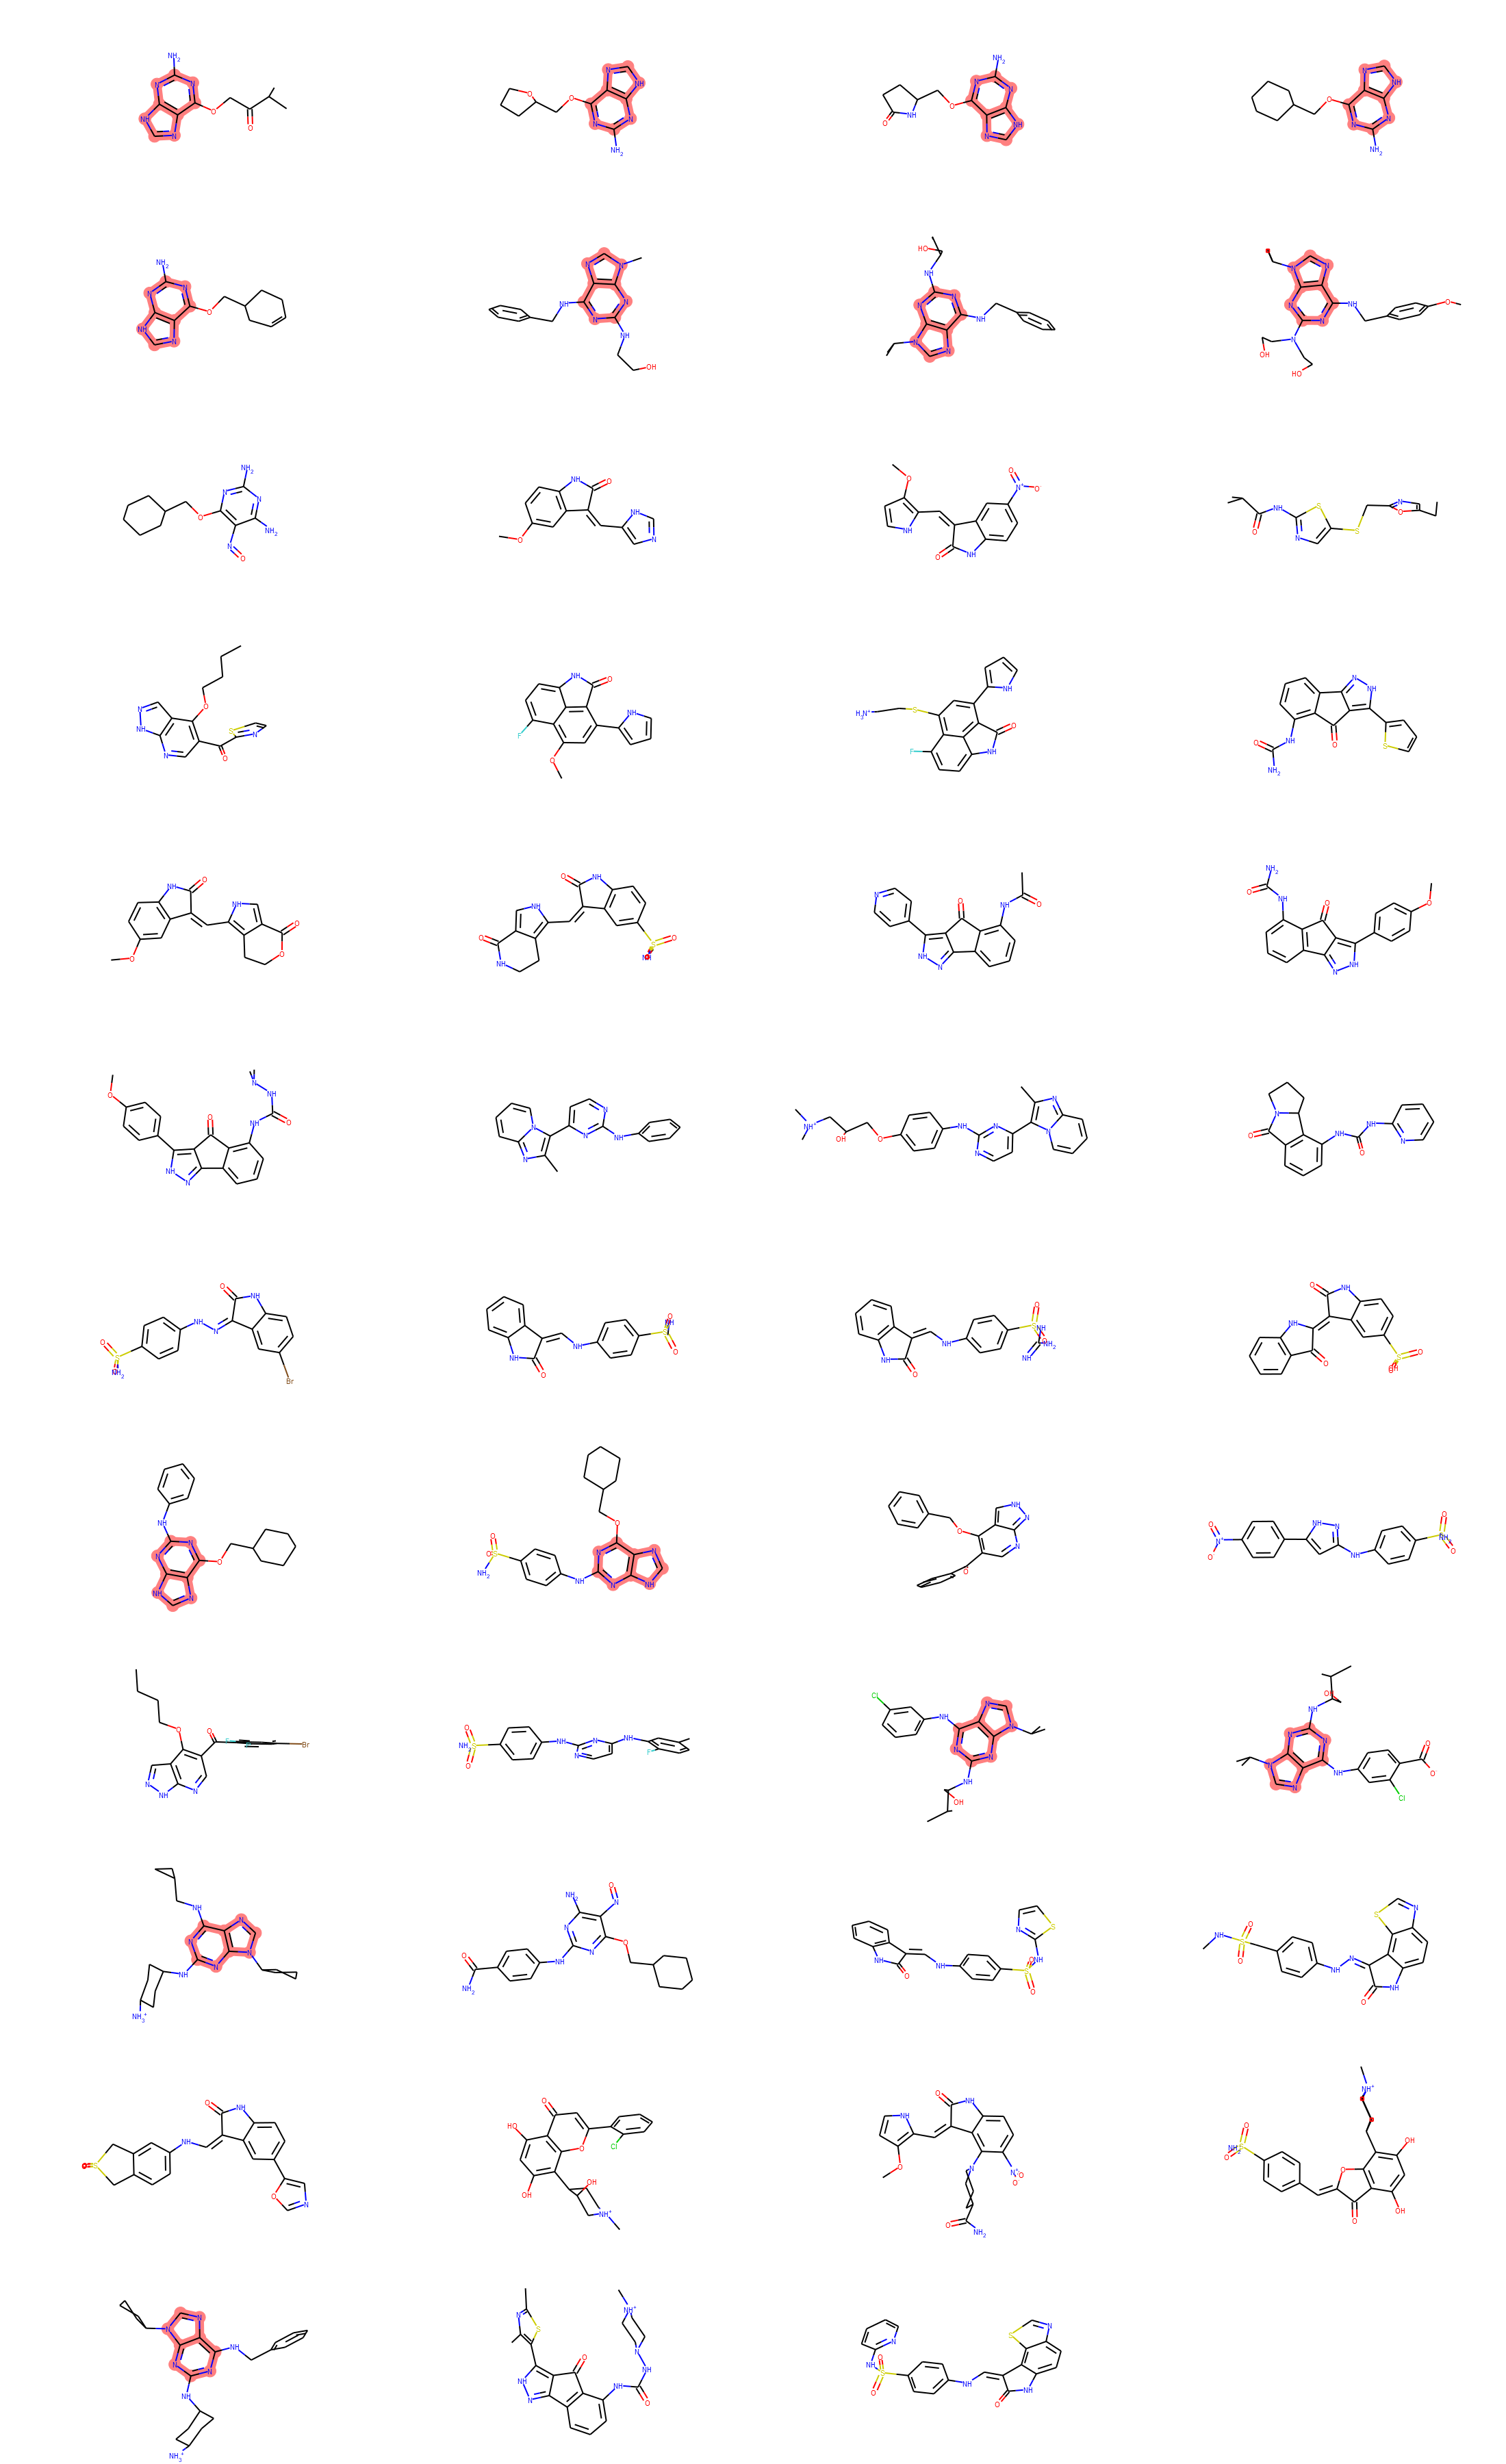

In [18]:
sdf = Chem.SDMolSupplier('Data/cdk2.sdf.txt') 
mols = [  m for m in sdf ]
core = Chem.MolFromSmiles( 'c1ncc2nc[nH]c2n1' )
# highlightAtomLists is list of atom list that you want to highlight.
Draw.MolsToGridImage( mols, molsPerRow=4, subImgSize=(550, 300), highlightAtomLists=[
mol.GetSubstructMatch(core) for mol in mols] )


## 3D structure display

In [19]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawMol3D(imatinib_m, size=(400, 400), confId=0)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Reading Protein structure data

Using cdkit, we can also read/analyze a PDB (protein/DNA) file. Let us view human ABL1 protein mentioned in the simpson etal paper. ABL1_human is a non-receptor tyrosine protein kinase. It plays a key role in many human diseases. ABL1 has 1,130 amino acids. The PDB ID 6NPV contains structural information for a smaller segment (residues 229 - 512) of the protein.  

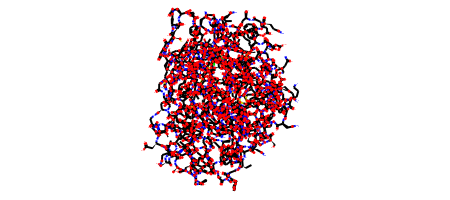

In [20]:
p_6npv = Chem.MolFromPDBFile('Data/6npv_a.pdb', sanitize = True, removeHs = True)
p_6npv

You can do better with py3Dmol. Here is an image of the same ABL1 protein structure displayed in cartoon format.

In [21]:
import py3Dmol
p = py3Dmol.view(query='mmtf:6npv')
p.setStyle({'cartoon': {'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Let us display multiple molecules in different style in a grid

In [22]:
# code chunk is from the py3D manual. I have made small changes Ravi

view = py3Dmol.view(query='pdb:6npv', linked=False, viewergrid=(2,2))
view.setViewStyle({'style':'outline','color':'blue','width':0.1})
view.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'spectrum'}},viewer=(0,1))
view.setStyle({'stick':{'colorscheme':'greenCarbon'}},viewer=(1,0))
view.setStyle({'cartoon':{'color':'spectrum'}},viewer=(1,1))
view.removeAllModels(viewer=(0,0))
view.addModel(imatinib_mblock,viewer=(0,0))
view.setStyle({'stick':{}},viewer=(0,0))
view.zoomTo(viewer=(0,0))
view.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Extracting information from PDB:

In [23]:
p_6npv.GetNumAtoms()

# extract the residue information for each atom:
residues = [atom.GetPDBResidueInfo() for atom in p_6npv.GetAtoms()]

# number of atoms for each residue
resinf = [(res.GetResidueNumber(),res.GetResidueName()) for res in residues]

# display them
resinf[:10]
print('protein residue/atom information of the first two residues: ', resinf[1:13],'\n')

# and get the ordered list of actual residues:
residues = sorted(set(resinf))
print('protein seq length: ', len(residues))

protein residue/atom information of the first two residues:  [(251, 'TYR'), (251, 'TYR'), (251, 'TYR'), (251, 'TYR'), (252, 'ASP'), (252, 'ASP'), (252, 'ASP'), (252, 'ASP'), (252, 'ASP'), (252, 'ASP'), (252, 'ASP'), (252, 'ASP')] 

protein seq length:  266


### Fasta as input

In [24]:
fasta =""">6NPV:A
MHHHHHHENLYFQGSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIK
HPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVNAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGEN
HLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEK
DYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELGK
"""
m = Chem.MolFromFASTA(fasta)
print("Number of Atoms in 6NPV", m.GetNumAtoms() )


Number of Atoms in 6NPV 2439


## Energy minimization (for small molecules)

It is better to do energy minimization outside of rdkit. If you want to clean up compounds for visualization, the option is available. 

### Forcefield support in RDKit 

UFF and MMFF forcefields are available in rdkit. We can clean up the small molecule geometry using the two forcefields.

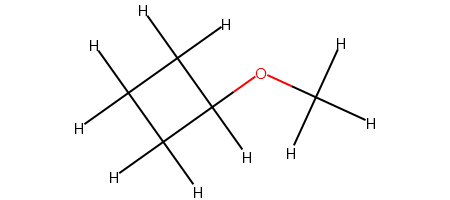

In [25]:
IPythonConsole.molSize = (450,200)
m = Chem.MolFromSmiles('C1CCC1OC')
m2=Chem.AddHs(m)
m2

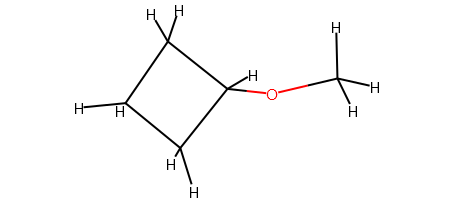

In [26]:
IPythonConsole.molSize = (450,200)
# generate crude 3D conformation
AllChem.EmbedMolecule(m2)
m2

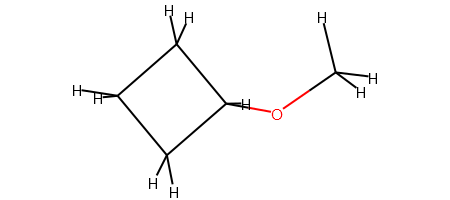

In [27]:
IPythonConsole.molSize = (450,200)
AllChem.UFFOptimizeMolecule(m2)
m2

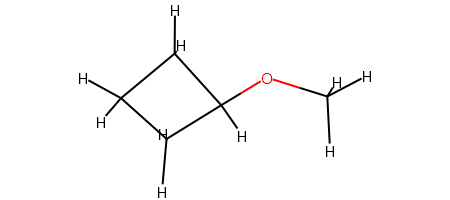

In [28]:
AllChem.UFFOptimizeMolecule(m2)
m3=Chem.AddHs(m)
m3
# use the new method
AllChem.EmbedMolecule(m3, AllChem.ETKDG())
m3

### Conformer generation 

You can use rdkit manual and related links to learn about conformer generation. We will not discuss this topic in the workshop.

Here is a linke that might of interest to you, http://rdkit.blogspot.com/2013/12/using-allchemconstrainedembed.html

## Structure alignment

We take two small molecules cocrystallized from two different protein structures (PDB IDs: 1PPC and 1DWD). 
Let us align them and report RMSD and an alignment score. 

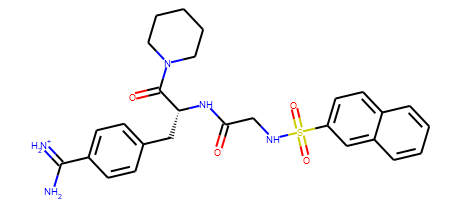

In [29]:
IPythonConsole.molSize = (450,200)
from rdkit import Chem, RDConfig
from rdkit.Chem import AllChem, rdMolAlign
# The reference molecule
ref = Chem.MolFromSmiles('NC(=[NH2+])c1ccc(C[C@@H](NC(=O)CNS(=O)(=O)c2ccc3ccccc3c2)C(=O)N2CCCCC2)cc1')
ref

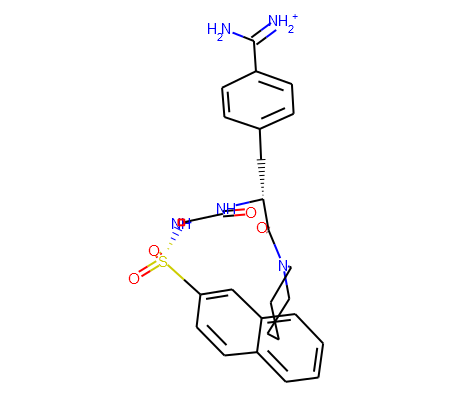

In [30]:
IPythonConsole.molSize = (450,400)
# The PDB 3D conformations
mol1 = Chem.MolFromPDBFile('Data/1DWD_ligand.pdb')
mol1 = AllChem.AssignBondOrdersFromTemplate(ref, mol1)
mol1

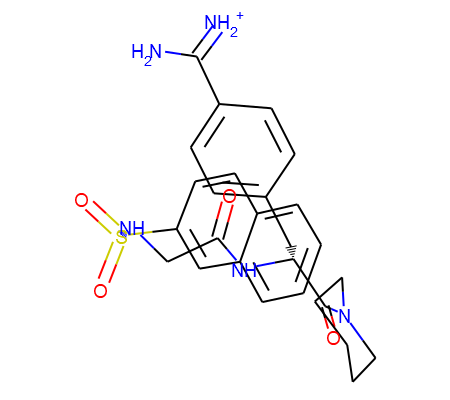

In [31]:
IPythonConsole.molSize = (450,400)
mol2 = Chem.MolFromPDBFile('Data/1PPC_ligand.pdb')
mol2 = AllChem.AssignBondOrdersFromTemplate(ref, mol2)
mol2

In [32]:
# Align them
RMSD = rdMolAlign.AlignMol(mol1, mol2)
print('RMSD :', RMSD)
# Align them with OPEN3DAlign
pyO3A = rdMolAlign.GetO3A(mol1, mol2)
score = pyO3A.Align()
print('Score: ',score)

RMSD : 1.5500195572773228
Score:  0.37645988504500316


### Visualization of molecular properties:

`SimilarityMaps` funciton can be used to visualize (color scheme) atom-based descriptors such as partial charges. 
For this example, we are going to compute Gasteiger partial charges for imatinib. Let us view the molecule first 
and then compute/map partial charges to the atoms. 

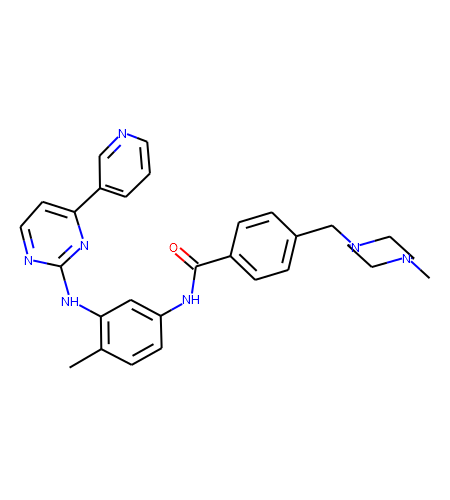

In [33]:
from ipymol import viewer as pymol
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms

IPythonConsole.molSize = (450,500)
mol = imatinib_m
mol

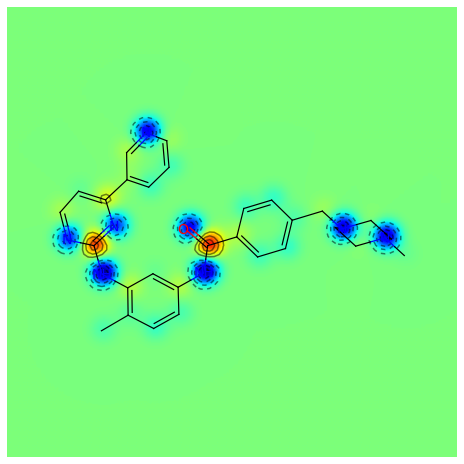

In [34]:
from rdkit.Chem.Draw import SimilarityMaps
AllChem.ComputeGasteigerCharges(mol)
contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

Please visit this informative link, 
https://github.com/rdkit/UGM_2018/blob/master/Notebooks/Landrum_Whats_New.ipynb
to learn the improvements in rdkit.

## Generating molecular properties

For this section, we will be using cdkit and Mordred (a molecular descriptor calculator) to generate molecular descriptors. Follow the links shown below for information on mordred calculator:

* https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0258-y
* https://github.com/mordred-descriptor/mordred


### Let us generate fingerprints (descriptors) for Imatinib

We will use Morgan Fringerprints. You can read about the details here, 
https://www.ncbi.nlm.nih.gov/pubmed/20426451 and here, https://www.daylight.com/dayhtml/doc/theory/theory.finger.html

Here is an informative article on the details of Morgan fingerprints, http://rdkit.blogspot.com/2016/03/explaining-morgan-similarity.html

Note most of the ideas are based on examples from cdkit manual. In a nutshell, each fragment in a molecule correspond to a bit. Two similar molecular fingerprints will have many common bits.

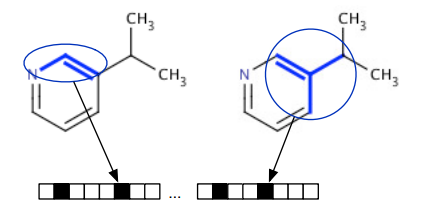

In [35]:
Image(filename='Img/FPComp.PNG',width = 300, height = 300 )
# (Following figure is based on an an online presentation)

Let us use the two molecules, mocetinostat and imatinib as an example. First let us visualize the molecules (see below), then compute finger-prints and use Dice similarity measure (https://www.daylight.com/dayhtml/doc/theory/theory.finger.html#RTFToC88) to compare the fingerprintes.

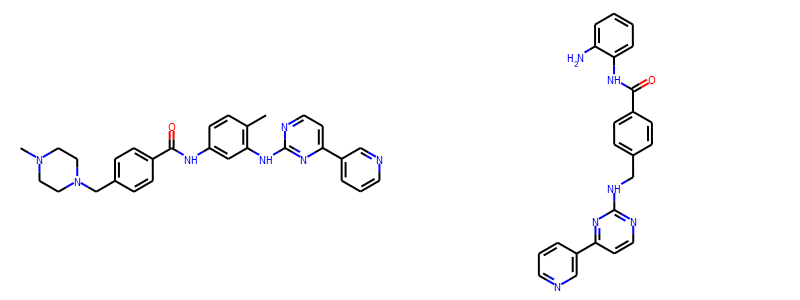

In [36]:
IPythonConsole.molSize = (450,200)
mocetinostat = 'C1=CC=C(C(=C1)N)NC(=O)C2=CC=C(C=C2)CNC3=NC=CC(=N3)C4=CN=CC=C4'
mocetinostat_m = Chem.MolFromSmiles(mocetinostat)
rdDepictor.Compute2DCoords(mocetinostat_m)
rdDepictor.Compute2DCoords(imatinib_m)
molecules1 = [imatinib_m, mocetinostat_m]
Draw.MolsToGridImage(molecules1, subImgSize=(400, 300), molsPerRow = 2)

In [37]:
from rdkit import DataStructs
fp1 = AllChem.GetMorganFingerprint(mocetinostat_m,2)
fp2 = AllChem.GetMorganFingerprint(imatinib_m,2)
print(DataStructs.DiceSimilarity(fp1,fp2))

0.7040816326530612


### Touch the bits

((22, 1),)


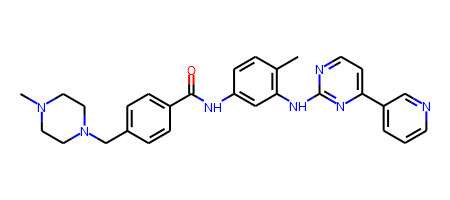

In [38]:
IPythonConsole.molSize = (450,200)
from rdkit.Chem import Draw
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(imatinib_m, radius=2, bitInfo=bi)
# print('bi: ', bi)
i = 1224
print(bi[i])
imatinib_m

### We can convert fingerprints (FP) to bits and view them 

In [39]:
bits = fp.ToBitString()
bits

'000000000000001000000000000000000000000000000000000000000000000000000000001000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000001000000000000000100000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000001000000000000000000001000000000000000000000000000100001000000000000000000000000000000000000000000000000010000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000010000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000010010000000000000000000100000000000000000000000000000000000100000000000000000000000000000001000000000000000000000000000000000000000000000000001000000001000000000000000000000000000000000000000000001000000000000000000

## Mordred: For computing descriptors

We will be using a python package called  mordred for generating descriptors. Mordred Github Page: https://github.com/mordred-descriptor/mordred

List of descriptors computed using mordred: 
```
ABCIndex AcidBase AdjacencyMatrix Aromatic AtomCount
Autocorrelation BalabanJ BaryszMatrix BCUT BertzCT BondCount CarbonTypes Chi
Constitutional CPSA DetourMatrix DistanceMatrix EccentricConnectivityIndex
EState ExtendedTopochemicalAtom FragmentComplexity Framework GeometricalIndex
GravitationalIndex HydrogenBond InformationContent KappaShapeIndex Lipinski
McGowanVolume MoeType MolecularDistanceEdge MolecularId MomentOfInertia MoRSE
PathCount Polarizability RingCount RotatableBond SLogP TopologicalCharge
TopologicalIndex TopoPSA VdwVolumeABC VertexAdjacencyInformation WalkCount
Weight WienerIndex ZagrebIndex
```

### Comptue molecular descriptors for Imatinib

In [40]:
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

# calculate single molecule
# mol = Chem.MolFromSmiles('CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5')
mol_prop = calc(imatinib_m)
type(mol_prop)
print(mol_prop[:10])

# To list all the descriptors total 1613
# print(calc.descriptors)
print(len(calc.descriptors))

[29.198227084312332, 19.516969637617162, 0, 2, 49.1616338518358, 2.372243745626595, 4.7444874912531905, 49.1616338518358, 1.328692806806373, 4.541483059145523]
1613


**Please inspect the descriptor table before you use them in other calculations. Especially when you are generating all the descriptors, some of the columns may contain NA or Nan etc.**

In [41]:
# calculate multiple molecule
mols = [Chem.MolFromSmiles(smi) for smi in [imatinib, dasatinib, gnf5, dph]]

# as pandas
df = calc.pandas(mols)

100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


In [42]:
df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,29.198227,19.516970,0,2,49.161634,2.372244,4.744487,49.161634,1.328693,4.541483,...,10.415502,73.587263,493.259009,7.253809,5324,56,194.0,224.0,9.972222,8.083333
1,25.731643,19.151718,0,1,42.312870,2.394767,4.762938,42.312870,1.282208,4.422390,...,10.323283,82.603238,487.155722,8.256877,3723,50,172.0,200.0,10.472222,7.277778
2,23.132682,16.941805,0,0,38.063201,2.370962,4.741923,38.063201,1.268773,4.312334,...,10.143881,65.313648,418.125275,8.896282,2918,42,152.0,171.0,10.090278,6.597222
3,19.924959,16.140292,0,0,32.867760,2.498596,4.828813,32.867760,1.314710,4.170130,...,10.150621,75.953704,336.102254,8.844796,1431,38,136.0,162.0,7.250000,5.388889


## What if you want to generate only selected descriptors?

In [43]:
from mordred import Calculator, descriptors

# calc = Calculator([ ABCIndex, AcidBase.AcidicGroupCount, Weight.Weight(),ZagrebIndex.ZagrebIndex(1, 1),   
#     WienerIndex.WienerIndex(False), ], ignore_3D=True)
# print(len(calc.descriptors))  # 6

descriptor_list = {'MW', 'nHBDon','nRing','nHBAcc',
                   'nRot','SLogP','TopoPSA'}

# register all descriptors
calc = Calculator(descriptors, ignore_3D=True)

# calculate multiple molecule
# re-register subset of descriptors
calc.descriptors = [d for d in calc.descriptors if str(d) in descriptor_list]

mols = [Chem.MolFromSmiles(smi) for smi in [imatinib, dasatinib, gnf5, dph]]

df1 = calc.pandas(mols)
df1

100%|██████████| 4/4 [00:01<00:00,  2.24it/s]


,nHBAcc,nHBDon,nRing,nRot,SLogP,TopoPSA,MW
0,7,2,5,7,4.59032,86.28,493.259009
1,9,3,4,7,3.31354,134.75,487.155722
2,6,3,3,7,3.50790,96.37,418.125275
3,4,2,4,3,2.55890,76.02,336.102254


### Using mordred you can create your own descriptor combinations

In [44]:
from mordred.SLogP import SLogP
from mordred.Lipinski import Lipinski

# Start Code 8
slogp = SLogP()
lipinski = Lipinski()
product_term = slogp * lipinski
print(str(product_term))
print(product_term(Chem.MolFromSmiles("c1ccccc1")))

(SLogP*Lipinski)
1.6866


<div class="alert alert-success">
    <b>Exercise-1: Create a visual display of the following RAS inhibitors and identify whether the molecules have napthelene fragment </b>:
     <ul>
      <li>
          Here is a list of PubChem CIDs:
132145288 
132145444 
134325670
134326383
134325731
138911339
137278711
132145654
134817260
137796984
134817259
          
Your task is to complete the following things:
          <li> Create a SMILES string list file of the above mentioned KRAS inhibitors. You can use PubChem ( https://pubchem.ncbi.nlm.nih.gov/) for this task
          <li> Read the file created in the previous step to create a grid display (discussed in the workshop) of the molecules 
          <li> Identify whether the molecules have napthelene fragment
          <ul> <li> Napthelene are fused benzene rings; you can read/view the napthalene fragment here, href="https://en.wikipedia.org/wiki/Naphthalene"</a>) </li> 
    </ul>      
    </ul>
</div>

<div class="alert alert-info">
    <b> Solution for Exercise-1: Try on your own. If you want to see the solution, uncomment the following line by removing the pound (#) sign and run it to load the solution. Then run the solution containing chunk to see the output</b>
</div>

In [45]:
# %load Solutions/solutions1.py

<div class="alert alert-success">
    <b>Exercise-1a (continuation of Exercise-1): Use mordred to create molecular descriptors (see below) for the RAS inhibitors and save the output in a csv formatted file. Compute only the following descriptors: 'MW', 'nHBDon','nRing','nHBAcc','nRot','SLogP' and 'TopoPSA'</b>:
</div>

<div class="alert alert-info">
    <b> Solution for Exercise-1a: Try on your own. If you want to see the solution, uncomment the following line by removing the pound (#) sign and run it to load the solution. Then run the solution containing chunk to see the output</b>
</div>

In [46]:
# %load Solutions/solutions1a.py

**Acknowledgements:** Drs. George Zaki, Andrew Weisman and Eric Stahlberg. I would also like to thank FNLCR BIDS colleagues for reviewing the materials.